In [4]:
import math
import numpy

def inversionBits(q,k):
    m = 0
    i = k
    for b in range(q):
        m = m|(i&1)
        m = m<<1
        i = i>>1
    m = m>>1
    return m

def rangerInversionBits(q,x,y):
    N = 2**q
    for k in range(N):
        m = inversionBits(q,k)
        y[m] = x[k]

def etapeFFT(x,y,q,e):
    ne = 2**e
    nem1 = int(ne/2)
    for k in range(1,nem1):
        phi = 2*math.pi*k/ne
        W = math.cos(phi)+math.sin(phi)*1j
        for i in range(2**(q-e)): # boucle sur les paquets de ne termes
            h = i*ne # premier indice du paquet
            y[h+k] = x[h+k]+W*x[h+k+nem1]
            y[h+ne-k] = x[h+ne-k-nem1]+W.conjugate()*x[h+ne-k]
    for i in range(2**(q-e)):
        h = i*ne
        y[h] = x[h]+x[h+nem1]
        y[h+nem1] = x[h]-x[h+nem1]

def fft1(u,q):
    x = numpy.array(u,dtype=complex)
    y = numpy.zeros(2**q,dtype=complex)
    rangerInversionBits(q,x,y)
    z = x
    x = y
    y = z
    for e in range(1,q+1):
        etapeFFT(x,y,q,e)
        z = x
        x = y
        y = z
    return x

In [8]:
q = 4
N = 2**q
u = numpy.zeros(N,dtype=complex)
#i = numpy.zeros(N,dtype=int)
for k in range(N):
    #i[k] = k
    u[k] = math.sin(2*math.pi*k/N)+0.5*math.sin(4*math.pi*k/N)+0.25*math.cos(10*math.pi*k/N)
tfd = fft1(u,q)

<StemContainer object of 3 artists>

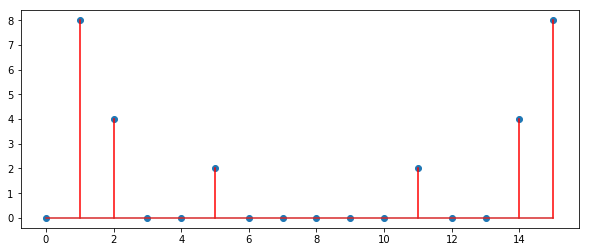

In [9]:
from pylab import *
spectre = numpy.absolute(tfd)
figure(figsize=(10,4))
stem(i,spectre,'r')